## 3.1 
**Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.
Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.
(Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)**


In [54]:
import pandas as pd

gold = pd.read_csv('GOLD.csv')
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


In [55]:
gold_wt_nan = gold.dropna()
gold_wt_nan

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


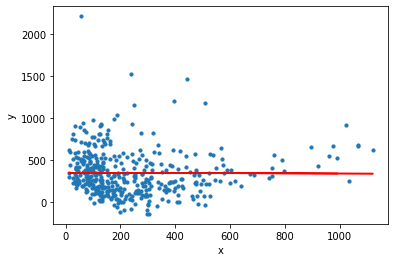

In [56]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = np.array(gold_wt_nan["Pred"])
x = np.array(gold_wt_nan["new"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)

regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_predicted, color='r')
plt.show()

In [57]:
pre_data = gold[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (regression_model.predict(pre_data_new))
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()
gold['Pred'] = sata
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,342.168758,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,342.507637,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,342.682017,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,341.872658,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,336.103055,919.376358


Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  1.2291678799353053e-23
R2 score:  1.0


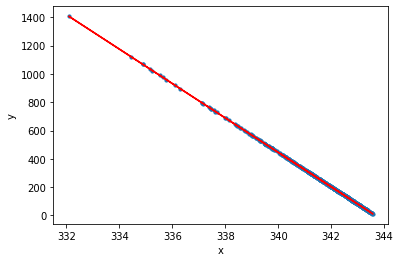

In [59]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset
y = np.array(gold["new"])
x = np.array(gold["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)

regression_model = LinearRegression()
regression_model.fit(x, y)

y_predicted = regression_model.predict(x)


rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)


print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_predicted, color='r')
plt.show()

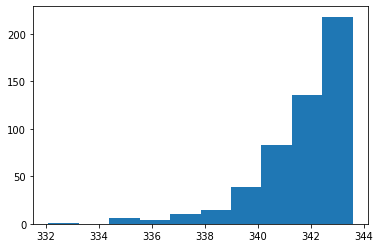

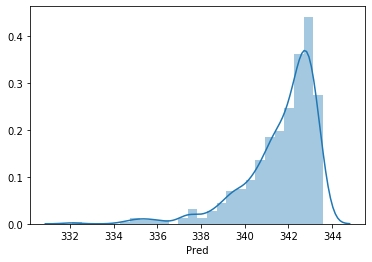

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(gold['Pred'])
plt.show()

sns.distplot(gold['Pred'])
plt.show()

## 3.2 

**Import the stock of your choosing AND the Nifty index.
Using linear regression (OLS), calculate -
The daily Beta value for the past 3 months. (Daily= Daily returns)
The monthly Beta value. (Monthly= Monthly returns)
Refrain from using the (covariance(x,y)/variance(x)) formula.
Attempt the question using regression.(Regression Reference)
Were the Beta values more or less than 1 ? What if it was negative ?
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results**

In [62]:
gail_data = pd.read_csv('GAIL.csv')
gail_data['Date'] = pd.to_datetime(gail_data['Date'])
gail_data = gail_data.sort_values('Date')
gail_data.set_index('Date', inplace=True)
gail_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,GAIL,EQ,409.20,413.05,415.25,410.00,413.80,414.00,412.83,1077551,4.448488e+08,22153,459059,42.60
2017-05-16,GAIL,EQ,414.00,415.80,416.00,410.25,411.00,411.40,412.85,2434834,1.005216e+09,46472,1771251,72.75
2017-05-17,GAIL,EQ,411.40,411.50,412.90,405.60,408.50,408.30,408.42,2002105,8.177070e+08,48972,1405319,70.19
2017-05-18,GAIL,EQ,408.30,406.35,409.00,401.50,403.00,404.75,407.03,2132140,8.678451e+08,39137,1405640,65.93
2017-05-19,GAIL,EQ,404.75,404.00,406.35,396.00,401.35,401.05,400.31,2847835,1.140022e+09,64928,1922275,67.50
2017-05-22,GAIL,EQ,401.05,404.30,404.30,387.05,388.85,390.20,394.05,2356287,9.285061e+08,47455,982053,41.68
2017-05-23,GAIL,EQ,390.20,380.10,386.45,365.50,380.00,380.35,374.70,9935103,3.722635e+09,103859,4352691,43.81
2017-05-24,GAIL,EQ,380.35,382.00,392.75,375.15,392.00,390.65,386.42,4051382,1.565545e+09,67002,1782890,44.01
2017-05-25,GAIL,EQ,390.65,392.55,403.95,391.90,396.80,401.00,399.79,7771785,3.107071e+09,92446,5353155,68.88


In [63]:
nifty_data = pd.read_csv('Nifty50.csv')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
nifty_data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
2017-05-22,9480.25,9498.65,9427.90,9438.25,202874757,9432.97
2017-05-23,9445.05,9448.05,9370.00,9386.15,231345629,11553.27
2017-05-24,9410.90,9431.90,9341.65,9360.55,218265181,11045.95
2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26


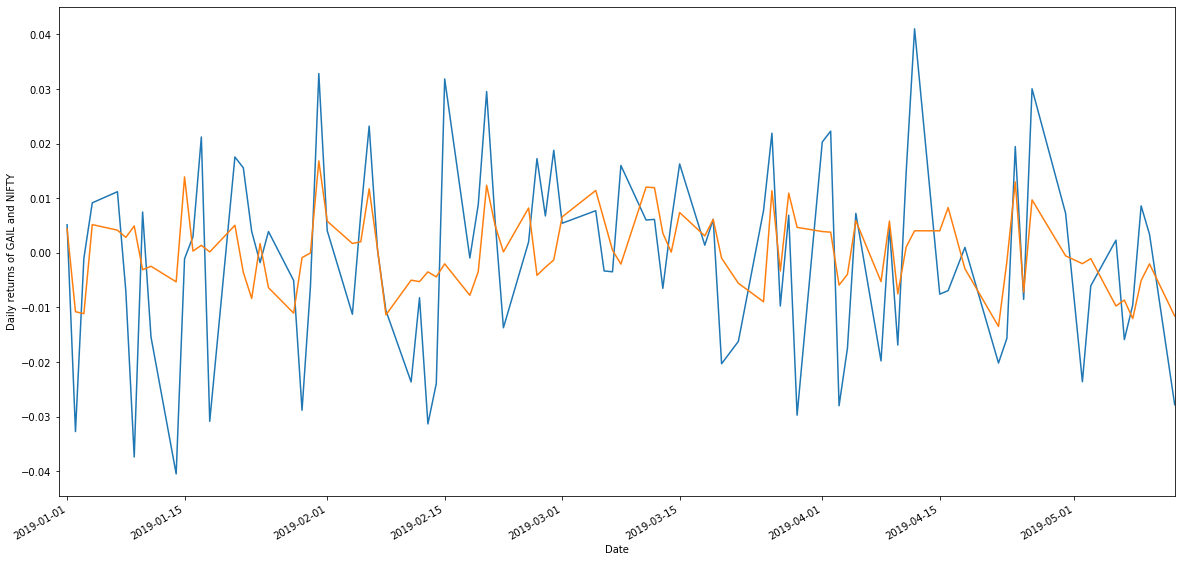

In [66]:
filtered_gail= gail_data[404:]
filtered_nifty = nifty_data[404:]

return_gail = filtered_gail['Close Price'].pct_change()
return_nifty = filtered_nifty['Close'].pct_change()

plt.figure(figsize=(20,10))
return_gail.plot()
return_nifty.plot()
plt.ylabel("Daily returns of GAIL and NIFTY")
plt.show()

In [69]:
filtered_gail['pct_change'] = filtered_gail['Close Price'].pct_change()
filtered_nifty['pct_change'] = filtered_nifty['Close'].pct_change()

x = filtered_gail['pct_change'].dropna()
y = filtered_nifty['pct_change'].dropna()
import pandas as pd 
import statsmodels.api as sm
myModel = sm.OLS(y,x).fit()
myModel.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_change   R-squared (uncentered):                   0.224
Model:                            OLS   Adj. R-squared (uncentered):              0.215
Method:                 Least Squares   F-statistic:                              25.43
Date:                Wed, 30 Oct 2019   Prob (F-statistic):                    2.43e-06
Time:                        20:48:19   Log-Likelihood:                          328.25
No. Observations:                  89   AIC:                                     -654.5
Df Residuals:                      88   BIC:                                     -652.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     0.1896      0.038      5.043      0.000       0.115       0.264
==============================================================================
Omnibus:                        3.502   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                1.945
Skew:                           0.007   Prob(JB):                        0.378
Kurtosis:                       2.276   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
import pandas as pd
import statsmodels.api as sm
# downloaded monthly data from Yahoo finance
gail = pd.read_csv('GAIL.NS.csv', parse_dates=True, index_col='Date',)
nifty50 = pd.read_csv('^NSEI.csv', parse_dates=True, index_col='Date')

monthly_prices = pd.concat([gail['Close'], nifty50['Close']], axis=1)
monthly_prices.columns = ['GAIL', 'NIFTY50']

print(monthly_prices)

monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  


                  GAIL       NIFTY50
Date                                
2017-11-01  175.649994  10226.549805
2017-12-01  187.369003  10530.700195
2018-01-01  179.475006  11027.700195
2018-02-01  171.561996  10492.849609
2018-03-01  164.274994  10113.700195
2018-04-01  162.550003  10739.349609
2018-05-01  175.449997  10736.150391
2018-06-01  170.125000  10714.299805
2018-07-01  187.574997  11356.500000
2018-08-01  186.100006  11680.500000
2018-09-01  189.500000  10930.450195
2018-10-01  187.125000  10386.599609
2018-11-01  171.524994  10876.750000
2018-12-01  180.149994  10862.549805
2019-01-01  166.074997  10830.950195
2019-02-01  171.000000  10792.500000
2019-03-01  173.824997  11623.900391
2019-04-01  177.975006  11748.150391
2019-05-01  180.500000  11922.799805
2019-06-01  155.975006  11788.849609
2019-07-01  128.850006  11118.000000
2019-08-01  129.800003  11023.250000
2019-09-01  134.500000  11474.450195
2019-10-01  125.849998  11786.849609


In [85]:
X = clean_monthly_returns['GAIL']
y = clean_monthly_returns['NIFTY50']

X1 = sm.add_constant(X)

model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2.619
Date:                Wed, 30 Oct 2019   Prob (F-statistic):              0.121
Time:                        21:29:44   Log-Likelihood:                 43.370
No. Observations:                  23   AIC:                            -82.74
Df Residuals:                      21   BIC:                            -80.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0094      0.008      1.152      0.2

## Analysis
**According to investopeedia,
A portfolio with a beta of 1.2 is expected to move 120%, up or down, for every change in the benchmark.**
**A portfolio with a lower beta would be expected to have less up and down movement than the benchmark.** 

**Beta value for the past 3 months for the GAIL stock is 0.1896 which is less than 1 and hence it is less volatile.**
**The monthly beta value for GAIL stock is 0.2000 which implies that it is less volatile.**